In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import statistics as stats
# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [50]:
url=("Amazon Sale Report.csv")
amazon=pd.read_csv(url)
display(amazon)

c:\Users\Bhavnish\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [51]:
amazon.shape

(128975, 24)

In [52]:
amazon["promotion-ids"]. isna(). sum(). sum() 

49153

In [53]:
amazon=amazon.drop(['Unnamed: 22'], axis=1)
amazon.shape


(128975, 23)

In [54]:
display(amazon)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [55]:
amazon['fulfilled-by'] = amazon['fulfilled-by'].fillna(0)
display(amazon)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,0
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,0
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,0
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,0
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,0


In [56]:
amazon.loc[amazon['fulfilled-by'] == "Easy Ship", 'fulfilled-by'] = 1
amazon.head(10)
    

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,1
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,1
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,0
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,1
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,0
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,0
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,1,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,0
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,1
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,0
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,1,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,0


In [57]:
amazon.dtypes

    index               int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
dtype: object

bar graph of successful delievery on "04-30-22","05-30-22","06-30-22"

In [58]:
a=amazon["Date"]=="04-30-22"
q=sum(a)
b=amazon["Date"]=="05-30-22"
w=sum(b)
c=amazon["Date"]=="06-30-22"
e=sum(c)
y=amazon["Status"]=="Shipped"
sum(y)


77804

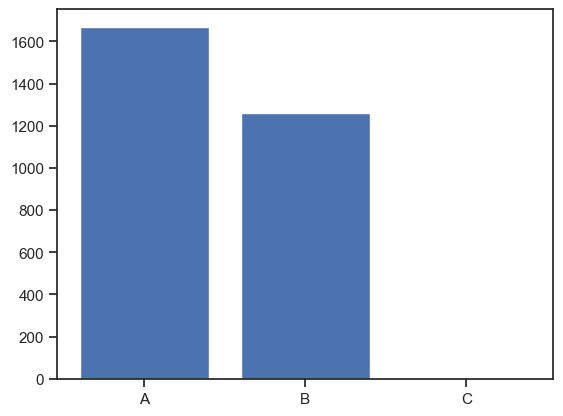

In [59]:
x = np.array(["A", "B", "C"])
y = np.array([sum(a), sum(b), sum(c)])

plt.bar(x,y)
plt.show()

State wise shipment


In [60]:
amazon['ship-state'] = amazon['ship-state'].str.upper()


no. of shipment state-wise

In [79]:
amazon_state=amazon.groupby(['ship-state']).sum()
#amazon_state.mean()
#print(amazon_state)
pd.set_option('display.max_rows', amazon_state.shape[0]+1)
print(amazon_state)


                         index    Qty       Amount  ship-postal-code  B2B
ship-state                                                               
ANDAMAN & NICOBAR     17476650    226    158723.62      1.912358e+08    1
ANDHRA PRADESH       363591833   4819   3219831.72      2.848143e+09   25
APO                      45187      0         0.00      9.591210e+05    0
ARUNACHAL PRADESH      9653433    135     98265.00      1.163070e+08    0
ASSAM                102175055   1483   1018136.20      1.302213e+09    4
BIHAR                131140189   1875   1415613.32      1.736168e+09    3
CHANDIGARH            21818649    304    211740.67      5.329162e+07    7
CHHATTISGARH          56239176    822    570485.83      4.483077e+08    3
DADRA AND NAGAR        4510713     58     42138.92      2.706191e+07    0
DELHI                450320202   6398   4393522.41      7.756444e+08   57
GOA                   71072917   1055    637685.85      4.587748e+08    7
GUJARAT              285377635   4149 

In [62]:
d = {
    "APO ": "ANDHRA PRADESH",
    "AR": "ARUNACHAL PRADESH",
    "NL":"NAGALAND",
    "PB":"PUNJAB",
    "RAJSHTHAN":"RAJASTHAN",
    "RAJSTHAN":"RAJASTHAN",
    "RJ":"RAJASTHAN",
    "PUDUCHERRY":"PONDICHERRY",
    "PUNJAB/MOHALI/ZIRAKPUR":"PUNJAB",
    "ORISSA":"ODISHA",
    "NEW DELHI": "DELHI"
}

for k, v in d.items():
    amazon['ship-state'] = amazon['ship-state'].replace([k], v)

In [63]:
amazon_state=amazon.groupby(['ship-state']).sum().reset_index()
#amazon_state.mean()
#print(amazon_state)
pd.set_option('display.max_rows', amazon_state.shape[0]+1)
print(amazon_state)
amazon_state.shape

            ship-state       index    Qty       Amount  ship-postal-code  B2B
0   ANDAMAN & NICOBAR     17476650    226    158723.62      1.912358e+08    1
1       ANDHRA PRADESH   363591833   4819   3219831.72      2.848143e+09   25
2                  APO       45187      0         0.00      9.591210e+05    0
3    ARUNACHAL PRADESH     9653433    135     98265.00      1.163070e+08    0
4                ASSAM   102175055   1483   1018136.20      1.302213e+09    4
5                BIHAR   131140189   1875   1415613.32      1.736168e+09    3
6           CHANDIGARH    21818649    304    211740.67      5.329162e+07    7
7         CHHATTISGARH    56239176    822    570485.83      4.483077e+08    3
8      DADRA AND NAGAR     4510713     58     42138.92      2.706191e+07    0
9                DELHI   450320202   6398   4393522.41      7.756444e+08   57
10                 GOA    71072917   1055    637685.85      4.587748e+08    7
11             GUJARAT   285377635   4149   2728651.82      1.72

(37, 6)

In [64]:
x=amazon_state["ship-state"]
print(x)
y=amazon_state["Qty"]
print(y)

0     ANDAMAN & NICOBAR 
1         ANDHRA PRADESH
2                    APO
3      ARUNACHAL PRADESH
4                  ASSAM
5                  BIHAR
6             CHANDIGARH
7           CHHATTISGARH
8        DADRA AND NAGAR
9                  DELHI
10                   GOA
11               GUJARAT
12               HARYANA
13      HIMACHAL PRADESH
14       JAMMU & KASHMIR
15             JHARKHAND
16             KARNATAKA
17                KERALA
18                LADAKH
19           LAKSHADWEEP
20        MADHYA PRADESH
21           MAHARASHTRA
22               MANIPUR
23             MEGHALAYA
24               MIZORAM
25              NAGALAND
26                ODISHA
27           PONDICHERRY
28                PUNJAB
29             RAJASTHAN
30                SIKKIM
31            TAMIL NADU
32             TELANGANA
33               TRIPURA
34         UTTAR PRADESH
35           UTTARAKHAND
36           WEST BENGAL
Name: ship-state, dtype: object
0       226
1      4819
2         0
3      

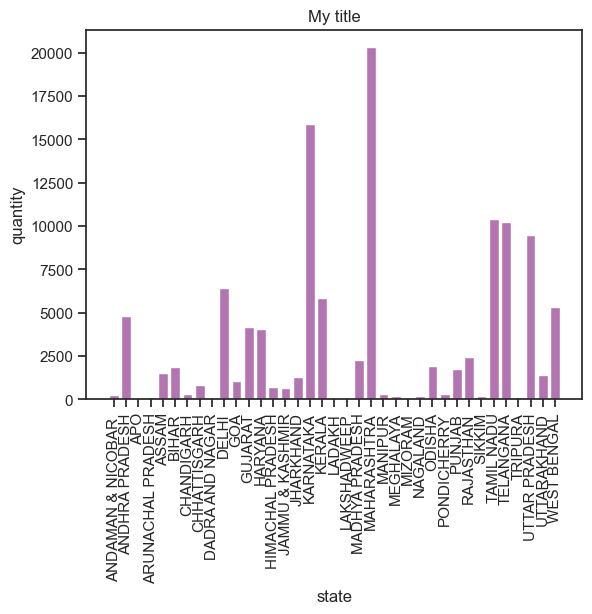

In [65]:
height = y
bars = x
x_pos = np.arange(len(x))
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
plt.title('My title')
plt.xlabel('state')
plt.ylabel('quantity')
plt.xticks(rotation='vertical')
plt.xticks(x_pos, bars)
plt.show()

In [66]:
article=amazon.groupby(['Category']).sum().reset_index()
display(article)


,Category,index,Qty,Amount,ship-postal-code,B2B
0,Blouse,52639563,863,458408.18,4.389592e+08,8
1,Bottom,25514814,398,150667.98,2.121130e+08,4
2,Dupatta,283130,3,915.00,1.566690e+06,0
3,Ethnic Dress,79945665,1053,791217.66,5.270223e+08,15
4,Saree,9400542,152,123933.76,7.886310e+07,2
5,Set,3177598276,45289,39204124.03,2.254322e+10,340
6,Top,666537619,9903,5347792.30,4.554459e+09,61
7,Western Dress,1089599960,13943,11216072.69,7.425162e+09,113
8,kurta,3215691256,45045,21299546.70,2.404336e+10,328


***LAB 3***

MOst active state


In [67]:
display(amazon_state)

,ship-state,index,Qty,Amount,ship-postal-code,B2B
0,ANDAMAN & NICOBAR,17476650,226,158723.62,1.912358e+08,1
1,ANDHRA PRADESH,363591833,4819,3219831.72,2.848143e+09,25
2,APO,45187,0,0.00,9.591210e+05,0
3,ARUNACHAL PRADESH,9653433,135,98265.00,1.163070e+08,0
4,ASSAM,102175055,1483,1018136.20,1.302213e+09,4
5,BIHAR,131140189,1875,1415613.32,1.736168e+09,3
6,CHANDIGARH,21818649,304,211740.67,5.329162e+07,7
7,CHHATTISGARH,56239176,822,570485.83,4.483077e+08,3
8,DADRA AND NAGAR,4510713,58,42138.92,2.706191e+07,0
9,DELHI,450320202,6398,4393522.41,7.756444e+08,57


In [73]:
# profitable ship state ( )???????????????????
avga = amazon_state.Amount / amazon_state.Qty
amazon_state['Average'] = avga
amazon_state
amazon_state.sort_values(by=['Qty'], ascending=False)

,ship-state,index,Qty,Amount,ship-postal-code,B2B,Average
21,MAHARASHTRA,1435329724,20328,13335534.14,9.108987e+09,195,656.018012
16,KARNATAKA,1133696665,15901,10481114.37,9.767912e+09,73,659.148127
31,TAMIL NADU,762311137,10412,6515650.11,7.032350e+09,57,625.782761
32,TELANGANA,750012613,10253,6916615.65,5.674546e+09,45,674.594328
34,UTTAR PRADESH,673608139,9499,6816642.08,2.372436e+09,150,717.616810
9,DELHI,450320202,6398,4393522.41,7.756444e+08,57,686.702471
17,KERALA,428162450,5813,3830227.58,4.498171e+09,17,658.907205
36,WEST BENGAL,364712234,5318,3507880.44,4.230499e+09,34,659.624002
1,ANDHRA PRADESH,363591833,4819,3219831.72,2.848143e+09,25,668.153501
11,GUJARAT,285377635,4149,2728651.82,1.720226e+09,50,657.664936


In [69]:
amazon_state

,ship-state,index,Qty,Amount,ship-postal-code,B2B
0,ANDAMAN & NICOBAR,17476650,226,158723.62,1.912358e+08,1
1,ANDHRA PRADESH,363591833,4819,3219831.72,2.848143e+09,25
2,APO,45187,0,0.00,9.591210e+05,0
3,ARUNACHAL PRADESH,9653433,135,98265.00,1.163070e+08,0
4,ASSAM,102175055,1483,1018136.20,1.302213e+09,4
5,BIHAR,131140189,1875,1415613.32,1.736168e+09,3
6,CHANDIGARH,21818649,304,211740.67,5.329162e+07,7
7,CHHATTISGARH,56239176,822,570485.83,4.483077e+08,3
8,DADRA AND NAGAR,4510713,58,42138.92,2.706191e+07,0
9,DELHI,450320202,6398,4393522.41,7.756444e+08,57


In [75]:
v=amazon_state.std()

C:\Users\Bhavnish\AppData\Local\Temp\ipykernel_3664\2603202514.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  v=amazon_state.std()


(array([4., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([4.18984186e+01, 2.53242686e+08, 5.06485329e+08, 7.59727973e+08,
        1.01297062e+09, 1.26621326e+09, 1.51945590e+09, 1.77269855e+09,
        2.02594119e+09, 2.27918384e+09, 2.53242648e+09]),
 <BarContainer object of 10 artists>)

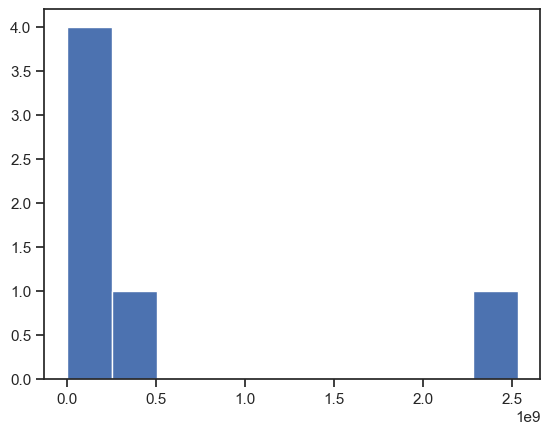

In [77]:
plt.hist(v)